### **Sklearn version 0.24.dev0**
**NOTE : We are using a specific version of sklearn beacuse the jetson nano was setup using sklearn 0.24.dev0**



In [ ]:
!pip uninstall scikit-learn -y
!pip install -U scikit-learn==0.24.dev0
import sklearn
print(sklearn.__version__)

Found existing installation: scikit-learn 0.24.dev0
Uninstalling scikit-learn-0.24.dev0:
  Successfully uninstalled scikit-learn-0.24.dev0
  Using cached scikit_learn-0.24.dev0-cp37-cp37m-manylinux2010_x86_64.whl (22.3 MB)


0.24.dev0


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split


from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score 
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, RandomForestClassifier

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pickle

# Intro
* In total there are 4 classes
  1. LHR -> 0
  2. RHR -> 1
  3. BHR -> 2
  4. BHU -> 3 

## 1. Importing Data

In [ ]:
LHR = pd.read_csv("/content/drive/MyDrive/Classification/data/LHR.csv")
RHR = pd.read_csv("/content/drive/MyDrive/Classification/data/RHR.csv")
BHR = pd.read_csv("/content/drive/MyDrive/Classification/data/BHR.csv")
BHU = pd.read_csv("/content/drive/MyDrive/Classification/data/BHU.csv")

# 2. Adding Target Label

In [ ]:
LHR['target'] = 0
RHR['target'] = 1
BHR['target'] = 2
BHU['target'] = 3

In [ ]:
df = pd.concat([LHR, RHR, BHR, BHU]).reset_index(drop=True).fillna(0)

In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,target
count,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000
mean,0.385268,0.480833,0.377872,0.484524,0.378222,0.473728,0.383265,0.493759,0.383396,0.466358,0.426852,0.513215,0.427225,0.452507,0.440714,0.545539,0.436294,0.420259,0.435031,0.560260,0.431638,0.384858,0.560486,0.499997,0.560893,0.462714,0.652133,0.499780,0.652982,0.462303,0.729080,0.500122,0.730390,0.459515,0.427423,0.482883,1.600000
std,0.054512,0.055324,0.054821,0.062209,0.054908,0.062099,0.054660,0.062568,0.054871,0.061962,0.052463,0.054856,0.053518,0.054155,0.062444,0.059211,0.068075,0.057533,0.118443,0.121983,0.111730,0.084058,0.060054,0.058971,0.060183,0.057781,0.068045,0.056896,0.068591,0.056490,0.076515,0.055734,0.088480,0.061758,0.052749,0.054194,1.018202
min,0.008929,0.278250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056053,0.314977,0.049293,0.251220,0.221231,0.339404,0.207651,0.214977,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.048899,0.283772,0.000000
25%,0.349004,0.456338,0.339549,0.460796,0.341077,0.449734,0.347665,0.467960,0.347804,0.441412,0.392720,0.488270,0.395937,0.432871,0.399026,0.517219,0.383510,0.399049,0.390148,0.521186,0.374893,0.346477,0.534649,0.477799,0.535443,0.443957,0.623690,0.478331,0.625556,0.442759,0.692579,0.479792,0.699164,0.441054,0.394411,0.457101,1.000000
50%,0.386910,0.471850,0.379426,0.477034,0.379092,0.466192,0.385644,0.485573,0.383612,0.458832,0.430276,0.503215,0.428170,0.444964,0.444364,0.538796,0.434414,0.420924,0.440235,0.581603,0.428604,0.379363,0.565155,0.492593,0.566425,0.456457,0.663941,0.492296,0.666914,0.453293,0.743618,0.494963,0.747755,0.452462,0.429704,0.473887,2.000000
75%,0.414091,0.502017,0.406308,0.506659,0.406553,0.496226,0.408881,0.515385,0.409963,0.489568,0.455942,0.528832,0.456260,0.470078,0.480762,0.563424,0.476877,0.444217,0.509560,0.615800,0.475031,0.438069,0.593466,0.516392,0.593449,0.478767,0.689517,0.520104,0.693452,0.478848,0.777219,0.520683,0.782431,0.477204,0.452919,0.499627,2.000000
max,0.555650,0.650250,0.546653,0.655900,0.546585,0.641238,0.544223,0.665676,0.544201,0.632882,0.578110,0.688053,0.579364,0.621221,0.635063,0.752984,0.620858,0.612811,0.698400,0.810168,0.685204,0.620103,0.709468,0.660014,0.708208,0.624820,0.796737,0.653867,0.796067,0.620672,0.886420,0.647447,0.884633,0.616685,0.578872,0.644920,3.000000


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,target
0,0.384075,0.462797,0.376670,0.467431,0.377742,0.457663,0.380761,0.474887,0.383612,0.452228,0.424233,0.494202,0.434877,0.443880,0.441760,0.533456,0.503899,0.437003,0.444452,0.587024,0.566258,0.434359,0.561631,0.488885,0.564161,0.456290,0.667489,0.491722,0.668318,0.452595,0.758419,0.492758,0.761411,0.446152,0.429523,0.469747,0
1,0.381916,0.455984,0.374226,0.459009,0.375961,0.449607,0.378605,0.466423,0.382852,0.442924,0.420431,0.487655,0.434628,0.436488,0.434510,0.527770,0.506268,0.431613,0.439955,0.581603,0.570305,0.425690,0.557321,0.483036,0.560425,0.450659,0.661997,0.480905,0.662909,0.442863,0.751761,0.485689,0.754611,0.440819,0.427241,0.461467,0
2,0.425525,0.456946,0.418635,0.461321,0.419487,0.451577,0.422483,0.471175,0.426675,0.446023,0.464231,0.489688,0.478420,0.439455,0.479260,0.529273,0.546015,0.433059,0.479758,0.581366,0.610543,0.427474,0.597243,0.486841,0.600965,0.452731,0.697606,0.487586,0.700186,0.447685,0.786654,0.487724,0.794363,0.446010,0.471035,0.464754,0
3,0.414634,0.443095,0.406327,0.446576,0.406205,0.440514,0.409844,0.451809,0.410311,0.445328,0.451550,0.472965,0.462279,0.436767,0.463726,0.522767,0.536398,0.424671,0.465097,0.567767,0.600545,0.418187,0.587547,0.474073,0.591091,0.446571,0.684566,0.476344,0.686612,0.439454,0.771618,0.477524,0.772443,0.440305,0.455016,0.456379,0
4,0.358302,0.445744,0.348463,0.451051,0.349753,0.439732,0.352311,0.462547,0.356718,0.432629,0.402838,0.488389,0.422959,0.424868,0.409281,0.539474,0.510344,0.420967,0.416163,0.600132,0.585046,0.418854,0.568923,0.482229,0.574807,0.445221,0.681356,0.492675,0.680987,0.442654,0.789479,0.492129,0.775550,0.434106,0.413206,0.456386,0


# Splitting the data

In [ ]:
X = df.drop("target", axis = 1)
y = df.target

# Machine learning

In [ ]:
def random_forest_scores(X, y, n):
    np.random.seed(42)
    X_train, X_valid, y_train, y_valid = train_test_split(X, y)
    model = make_pipeline(
        MinMaxScaler(),
        RandomForestClassifier(n_estimators=100, max_depth=12)
    )
    model.fit(X_train, y_train)
    t_score = model.score(X_train, y_train)
    v_score = model.score(X_valid, y_valid) 
    y_predicted_prob = model.predict_proba(X_valid)
    CVS_mean = np.mean(cross_val_score(model, X, y, cv = n))
    y_predicted = model.predict(X_valid)
    
    # Saving the model
    pickle.dump(model,open("RandomForestClf.pkl", "wb"))
    
    return [t_score, v_score, y_predicted, CVS_mean, y_predicted_prob, y_valid]

def mpl_scores(X, y, n):
    X_train, X_valid, y_train, y_valid = train_test_split(X, y)
    model = make_pipeline(
        MinMaxScaler(),
        MLPClassifier(solver='lbfgs', hidden_layer_sizes=(4,3),
                      learning_rate='adaptive', activation='identity',
                      max_iter=12000)
    )
    model.fit(X_train, y_train)
    t_score = model.score(X_train, y_train)
    v_score = model.score(X_valid, y_valid) 
    y_predicted_prob = model.predict_proba(X_valid)
    CVS_mean = np.mean(cross_val_score(model, X, y, cv = n))
    pickle.dump(model, open("MlpClf.pkl", "wb"))
    y_predicted = model.predict(X_valid)
    return [t_score, v_score, y_predicted, CVS_mean, y_predicted_prob, y_valid]


def gradient_boosting_scores(X, y, n):
    X_train, X_valid, y_train, y_valid =   train_test_split(X, y)
    model = make_pipeline(
        MinMaxScaler(),
        GradientBoostingClassifier(n_estimators=20, max_depth=3, min_samples_leaf=0.3)
    )
    model.fit(X_train, y_train)
    t_score = model.score(X_train, y_train)
    v_score = model.score(X_valid, y_valid) 
    y_predicted_prob = model.predict_proba(X_valid)
    CVS_mean = np.mean(cross_val_score(model, X, y, cv = n))
    y_predicted = model.predict(X_valid)
    return [t_score, v_score, y_predicted, CVS_mean, y_predicted_prob, y_valid]

def svc_scores(X, y, n):
    X_train, X_valid, y_train, y_valid = train_test_split(X, y)
    model = make_pipeline(
        StandardScaler(),
        SVC(kernel='linear', C=2.0, probability=True)
    )
    model.fit(X_train, y_train)
    pickle.dump(model, open("SVCClf.pkl", "wb"))
    t_score = model.score(X_train, y_train)
    v_score = model.score(X_valid, y_valid) 
    y_predicted_prob = model.predict_proba(X_valid)
    CVS_mean = np.mean(cross_val_score(model, X, y, cv = n))
    y_predicted = model.predict(X_valid)
    return [t_score, v_score, y_predicted, CVS_mean, y_predicted_prob, y_valid]

In [ ]:
def plot_roc_curve(fpr, tpr, model):
    """
    Input  :  1. False positve rate (fpr) of model 
              2. True postive rate (tpr) of model
              3. Name of model
    Output :  -> Roc Curve plot 
    """
    plt.figure(figsize=(11,7))
    # Plotting ROC curve
    plt.plot(fpr, tpr, color='red', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Guess')
    plt.plot([0, 1], [1, 1], color='orange', linestyle='-.', label='Best')
    plt.plot([0, 0], [0, 1], color='orange', linestyle='-.')
    plt.xlabel('False Positive Rate', fontsize=16,fontweight = 'bold').set_color('black')
    plt.ylabel('True Positive Rate', fontsize=16,fontweight = 'bold').set_color('black')
    plt.title(f'ROC Curve using {model}',fontsize=20,fontweight = 'bold')
    plt.legend(fontsize=15, loc = 0)
    plt.savefig(f"Images/Significant_plots/Roc{model}.jpeg")
    plt.show()

def plot_conf_mat(conf_mat, model):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(conf_mat,
                     annot=True, # Annotate the boxes 
                     cbar=False)
    plt.title(f'Confusion matrix \n using {model}', fontsize=18,fontweight = 'bold')
    plt.xlabel('Predicted label', fontsize=16,fontweight = 'bold').set_color('black')
    plt.ylabel('True label', fontsize=16,fontweight = 'bold').set_color('black')
    #plt.savefig(f"Images/Significant_plots/Conf_{model}.jpeg")
    plt.show()

def print_classification_report(y_test, y_valid):    
    print(pd.DataFrame(classification_report(y_test, y_valid, output_dict=True)))
    

def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

def model_automator(model, n, Model_Name):
    np.random.seed(50)
    
    train_score, test_score, y_predicted, mean_n, y_predicted_prob, y_valid = model(X, y, n)
    print(f"Train data Accuracy                           : {train_score * 100:.2f}%")
    print(f"Test data Accuracy                            : {test_score * 100:.2f}%")
    print(f"{n}-fold Accuracy                               : {mean_n * 100:.2f}%")
    y_predicted_prob = y_predicted_prob[:, 1]
    #fpr, tpr, thresholds = roc_curve(y_valid, y_predicted)
    #print("Receiver Operating Characteristic (ROC) Score :",roc_auc_score(y_valid, y_predicted_prob))
    #plot_roc_curve(fpr,tpr, Model_Name)
    matrix = confusion_matrix(y_valid, y_predicted)
    
    plot_conf_mat(matrix, Model_Name)
    
    print_classification_report(y_valid, y_predicted)

Train data Accuracy                           : 100.00%
Test data Accuracy                            : 98.65%
10-fold Accuracy                               : 98.30%


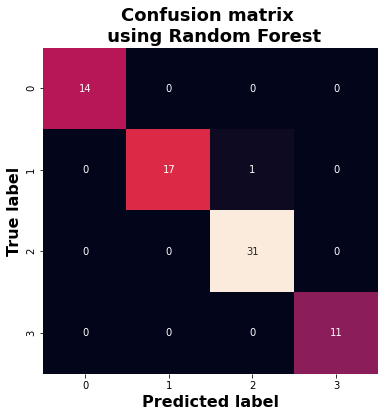

              0          1          2     3  accuracy  macro avg  weighted avg
precision   1.0   1.000000   0.968750   1.0  0.986486   0.992188      0.986909
recall      1.0   0.944444   1.000000   1.0  0.986486   0.986111      0.986486
f1-score    1.0   0.971429   0.984127   1.0  0.986486   0.988889      0.986401
support    14.0  18.000000  31.000000  11.0  0.986486  74.000000     74.000000


In [ ]:
model_automator(random_forest_scores, 10, 'Random Forest')

Train data Accuracy                           : 100.00%
Test data Accuracy                            : 100.00%
10-fold Accuracy                               : 98.98%


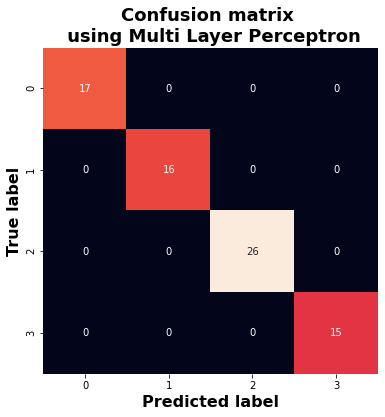

              0     1     2     3  accuracy  macro avg  weighted avg
precision   1.0   1.0   1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0   1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0   1.0   1.0       1.0        1.0           1.0
support    17.0  16.0  26.0  15.0       1.0       74.0          74.0


In [ ]:
model_automator(mpl_scores, 10, 'Multi Layer Perceptron')

Train data Accuracy                           : 100.00%
Test data Accuracy                            : 100.00%
10-fold Accuracy                               : 98.98%


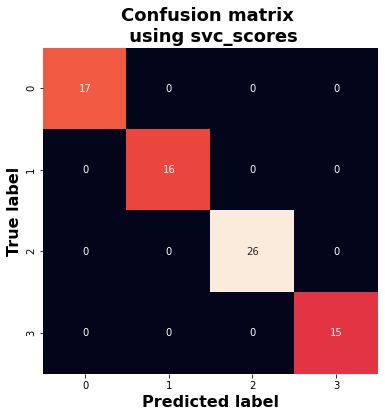

              0     1     2     3  accuracy  macro avg  weighted avg
precision   1.0   1.0   1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0   1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0   1.0   1.0       1.0        1.0           1.0
support    17.0  16.0  26.0  15.0       1.0       74.0          74.0


In [ ]:
model_automator(svc_scores, 10, 'svc_scores')